In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
#reading data

data_class1=pd.read_csv(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\Group13\Classification\LS_Group13\Class1.txt",header=None,delimiter=" ")
data_class2=pd.read_csv(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\Group13\Classification\LS_Group13\Class2.txt",header=None,delimiter=" ")
data_class3=pd.read_csv(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\Group13\Classification\LS_Group13\Class3.txt",header=None,delimiter=" ")

In [174]:
print(data_class1.shape)
print(data_class2.shape)
print(data_class3.shape)

(500, 2)
(500, 2)
(500, 2)


In [175]:
print(data_class1.head())

         0         1
0  13.0080  2.283900
1  17.0880  0.822770
2   9.8434  3.958500
3  18.0970 -0.637150
4  14.9460 -0.049254


In [176]:
#Splitting data into train-test proportion of 70-30

def split_data(data):
    m,n=data.shape
    k=int(0.7*m)
    training_data=data.iloc[:k]
    test_data=data.iloc[k:m]
    
    return training_data, test_data

In [177]:
train1, test1=split_data(data_class1)
train2, test2=split_data(data_class2)
train3, test3=split_data(data_class3)

In [178]:
print(type(train1),type(test1))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [179]:
print(train1.head())
print(test1.head())

         0         1
0  13.0080  2.283900
1  17.0880  0.822770
2   9.8434  3.958500
3  18.0970 -0.637150
4  14.9460 -0.049254
          0        1
350  17.646 -0.81086
351  21.753  0.47258
352  14.458 -0.22239
353  18.448 -1.29470
354  18.688 -2.28790


[]

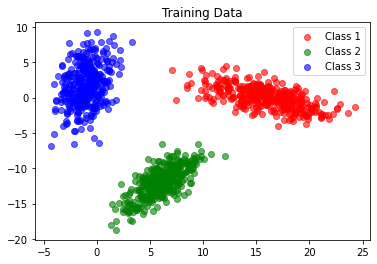

In [180]:
#Plotting training data

plt.scatter(train1[0],train1[1],color='r',alpha=0.6,label='Class 1')
plt.scatter(train2[0],train2[1],color='g',alpha=0.6,label='Class 2')
plt.scatter(train3[0],train3[1],color='b',alpha=0.6,label='Class 3')
plt.legend()
plt.title("Training Data")
plt.savefig(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\LS_results\Part1_Q1_train_data.png")
plt.plot()

In [181]:
# Training model
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [182]:
def perceptron(data,epoch=100,eta=0.001,track_performance=False):

    m,n=data.shape
    w=np.array([0,0,0])    # initializing weights to zero vector
    error=[]               # list of errors for each example in each epoch
    avg_error=[]           # list of average error for each epoch
    
    for j in range(epoch):
        for i in range(m):
            x_i=[1,data.iloc[i,0],data.iloc[i,1]]
            if i<int(m/2):
                y_i=0
            else:
                y_i=1
            
            a_i=np.dot(w.T,x_i)    #aggregated value
            s_i=sigmoid(a_i)

            # calculate error
            
            e=(1/2)*(y_i-s_i)**2
            error.append(e)
            
            # calculate gradient and update weights
            
            del_w=np.dot(eta*(y_i-s_i)*s_i*(1-s_i),x_i)
            w=w+del_w
        avg_e=sum(error)/len(error)
        avg_error.append(avg_e)
        
        if track_performance==True:
            print("Epoch: ",j+1,end="\t")
            print("Error: ",avg_e)
        epoch-=1
    final_error=avg_e     # final error after convergence
    
    return w,avg_error,final_error

In [183]:
# Training using one-against-one approach
# Preparing combined training data

train12=train1.append(train2,ignore_index=True)
train23=train2.append(train3,ignore_index=True)
train13=train1.append(train3,ignore_index=True)

print("Train class 1 and 2")
w12,avg_error12,final_error12=perceptron(train12,epoch=100,eta=0.1)
print("\n")
print("Train class 2 and 3")
w23,avg_error23,final_error23=perceptron(train23,epoch=100,eta=0.1)
print("\n")
print("Train class 1 and 3")
w13,avg_error13,final_error13=perceptron(train13,epoch=100,eta=0.1)

Train class 1 and 2


Train class 2 and 3


Train class 1 and 3


In [184]:
print('For class 1 and 2:\n')
print('Weights:{} \t Error:{}'.format(w12,round(final_error12,3)))
print('For class 2 and 3:\n')
print('Weights:{} \t Error:{}'.format(w23,round(final_error23,3)))
print('For class 1 and 3:\n')
print('Weights:{} \t Error:{}'.format(w13,round(final_error13,3)))

For class 1 and 2:

Weights:[ 0.01047818 -0.51024461 -1.21884457] 	 Error:2.647926935588277e-05
For class 2 and 3:

Weights:[ 4.16141205 -1.00702752  0.3613478 ] 	 Error:0.00045344298910997933
For class 1 and 3:

Weights:[ 4.07846109 -0.99319699  0.22333712] 	 Error:0.0004192376422174051


In [185]:
# Testing unseen data
def test_model(test,w):
    
    m,n=test.shape
    #s=[]         # predicted output
    y=[]           # predicted label
    for i in range(m):
        x_i=[1,test.iloc[i,0],test.iloc[i,1]]
        a_i=np.dot(w.T,x_i)
        s_i=sigmoid(a_i)
        #s.append(s_i)
        if s_i>0.5:
            y_i=1
        else:
            y_i=0
        y.append(y_i)
    return y

In [186]:
# Classifying test data using one-against-one approach
test12=test1.append(test2,ignore_index=True)
test23=test2.append(test3,ignore_index=True)
test13=test1.append(test3,ignore_index=True)

In [187]:
y12=test_model(test12,w12)
y23=test_model(test23,w23)
y13=test_model(test13,w13)

In [188]:
# Plotting decision boundary
x_min=min([min(data_class1.iloc[0]),min(data_class2.iloc[0]),min(data_class3.iloc[0])])
x_max=max([max(data_class1.iloc[0]),max(data_class2.iloc[0]),max(data_class3.iloc[0])])
y_min=min([min(data_class1.iloc[1]),min(data_class2.iloc[1]),min(data_class3.iloc[1])])
y_max=max([max(data_class1.iloc[1]),max(data_class2.iloc[1]),max(data_class3.iloc[1])])

xx, yy = np.meshgrid(np.arange(x_min-15, x_max+15, 0.1), np.arange(y_min-15, y_max+15, 0.1))
meshgrid=np.c_[xx.ravel(),yy.ravel()]       # flatten meshgrid and concatenate to create points

In [189]:
def decision_region(meshgrid,data1,data2,weights,class_label):
    
    c1=[];c2=[]
    
    # compute output for complete mesh
    meshgrid=pd.DataFrame(meshgrid)
    y_pred=test_model(meshgrid,weights)
    m,n=meshgrid.shape
    
    for i in range(m):
        if y_pred[i]==0:
            c1.append((meshgrid.iloc[i,0],meshgrid.iloc[i,1]))
            
        else:
            c2.append((meshgrid.iloc[i,0],meshgrid.iloc[i,1]))
    
    c1=np.array(c1)
    c2=np.array(c2)
    
    plt.scatter(c1[:,0],c1[:,1],color='coral',label="Region "+str(class_label[0]))
    plt.scatter(c2[:,0],c2[:,1],color='lightskyblue',label="Region "+str(class_label[1]))
    plt.scatter(data1[0],data1[1],color='red',edgecolors='black',alpha=0.6,label="Class "+str(class_label[0]))
    plt.scatter(data2[0],data2[1],color='steelblue',edgecolors='black',alpha=0.6,label="Class "+str(class_label[1]))
    plt.legend(loc="best")
    plt.title("Class "+str(class_label[0])+" V/S Class "+str(class_label[1]))
    plt.savefig(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\LS_results\Part1_Q1_decision_boundary"+str(class_label[0])+str(class_label[1])+".png")
    plt.show()
    
    return [c1,c2]

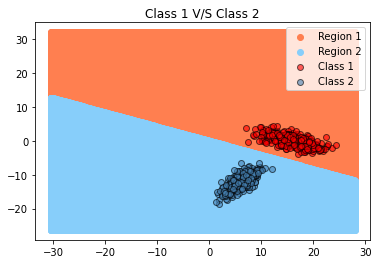

In [190]:
d12=decision_region(meshgrid,train1,train2,w12,class_label=[1,2])

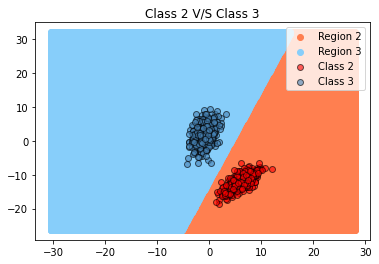

In [191]:
d23=decision_region(meshgrid,train2,train3,w23,class_label=[2,3])

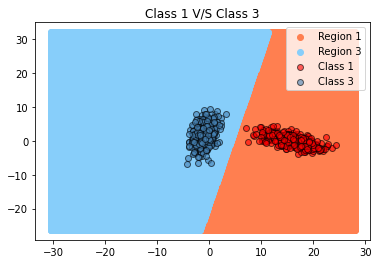

In [192]:
d13=decision_region(meshgrid,train1,train3,w13,class_label=[1,3])

[]

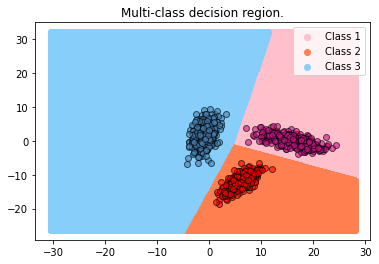

In [193]:
# plotting combined decision boundary
d1=set.intersection(set(map(tuple,d12[0])),set(map(tuple,d13[0])))
d2=set.intersection(set(map(tuple,d12[1])),set(map(tuple,d23[0])))
d3=set.intersection(set(map(tuple,d13[1])),set(map(tuple,d23[1])))
d1,d2,d3=np.array(list(d1)),np.array(list(d2)),np.array(list(d3))

plt.scatter(d1[:,0],d1[:,1],color='pink',label='Class 1')
plt.scatter(d2[:,0],d2[:,1],color='coral',label='Class 2')
plt.scatter(d3[:,0],d3[:,1],color='lightskyblue',label='Class 3')
plt.scatter(train1[0],train1[1],color='mediumvioletred',edgecolors='black',alpha=0.6)
plt.scatter(train2[0],train2[1],color='red',edgecolors='black',alpha=0.6)
plt.scatter(train3[0],train3[1],color='steelblue',edgecolors='black',alpha=0.6)
plt.legend(loc='best')
plt.title('Multi-class decision region.')
plt.savefig(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\LS_results\Part1_Q1_multi_class_decision_boundary.png")
plt.plot()

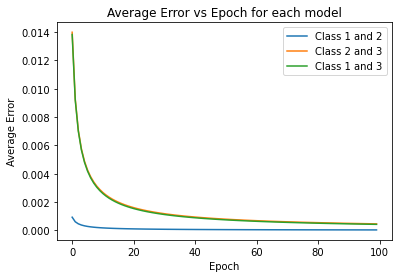

In [194]:
# plotting average error v/s epoch

plt.plot(avg_error12,label='Class 1 and 2')
plt.plot(avg_error23,label='Class 2 and 3')
plt.plot(avg_error13,label='Class 1 and 3')
plt.legend()
plt.title("Average Error vs Epoch for each model")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.savefig(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\LS_results\Part1_Q1_avg_error.png")
plt.show()

In [195]:
# Confusion matrix for test data

def confusion_matrix(predicted):
    c11,c22=0,0
    n=int(len(predicted)/2)
    for i in range(2*n):
        if i<int(n) and predicted[i]==0:
            c11+=1
        elif i>=int(n) and predicted[i]==1:
            c22+=1
    mat=np.array([[c11,n-c11],[n-c22,c22]])
    return mat

In [196]:
def multiclass_confusion_matrix(mat12,mat23,mat13):
    c11=mat12[0][0]+mat13[0][0]
    c12=mat12[0][1]
    c13=mat13[0][1]
    
    c21=mat12[1][0]
    c22=mat12[1][1]+mat23[0][0]
    c23=mat23[0][1]
    
    c31=mat13[1][0]
    c32=mat23[1][0]
    c33=mat13[1][1]+mat23[1][1]
    
    mat=np.array([[c11,c12,c13],[c21,c22,c23],[c31,c32,c33]])
    
    return mat

In [197]:
mat12=confusion_matrix(y12)
mat23=confusion_matrix(y23)
mat13=confusion_matrix(y13)
confusion_mat=multiclass_confusion_matrix(mat12,mat23,mat13)

In [198]:
print("Confusion Matrix for 3-class classification")
print(confusion_mat)

Confusion Matrix for 3-class classification
[[300   0   0]
 [  0 300   0]
 [  0   0 300]]


In [199]:
mat23

array([[150,   0],
       [  0, 150]])

In [200]:
mat13

array([[150,   0],
       [  0, 150]])

In [201]:
#Classification accuracy

def accuracy(x1,x2,x3,total):
    return ((x1+x2+x3)/total)*100

In [212]:
#Precision for a classifier

def precision(TP,FP):
    return TP/(TP+FP)*100

In [203]:
acc=accuracy(confusion_mat[0][0],confusion_mat[1][1],confusion_mat[2][2],len(y12)+len(y23)+len(y13))
print("Accuracy of model: ",acc)

Accuracy of model:  100.0


In [213]:
precision1=precision(confusion_mat[0][0],confusion_mat[0][1]+confusion_mat[0][2])
precision2=precision(confusion_mat[1][1],confusion_mat[1][0]+confusion_mat[1][2])
precision3=precision(confusion_mat[2][2],confusion_mat[2][0]+confusion_mat[2][1])

In [214]:
print("Average precision: ",(precision1+precision2+precision3)/3)

Average precision:  100.0


In [215]:
# recall for a classifier

def recall(TP,FN):
    return TP/(TP+FN)*100

In [216]:
recall1=recall(confusion_mat[0][0],confusion_mat[1][0]+confusion_mat[2][0])
recall2=recall(confusion_mat[1][1],confusion_mat[0][1]+confusion_mat[2][1])
recall3=recall(confusion_mat[2][2],confusion_mat[0][2]+confusion_mat[1][2])

In [217]:
print("Average recall: ",(recall1+recall2+recall3)/3)

Average recall:  100.0


In [209]:
# F-measure of a classifier
def f_measure(precision,recall):
    return 2*precision*recall/(precision+recall)

In [210]:
f1=f_measure(precision1,recall1)
f2=f_measure(precision2,recall2)
f3=f_measure(precision3,recall3)

In [211]:
print("Average F-measure: ",(f1+f2+f3)/3)

Average F-measure:  1.0
